In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [3]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


##### Посмотреть все уникальные значение колонки 'action'

In [4]:
events_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

##### Добавить новую колонку с человекочитаемой (human-readebl) датой

In [5]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [6]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [7]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [8]:
events_data['date'].min()

Timestamp('2015-06-15 04:00:48')

In [9]:
events_data['date'].max()

Timestamp('2018-05-19 23:33:31')

In [10]:
events_data['day'] = events_data['date'].dt.date

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


##### Четыре способа посчитать уникальных пользователей в день

In [12]:
events_data.groupby('day').agg({'user_id': 'nunique'}).head()

,user_id
day,
2015-06-15,705
2015-06-16,526
2015-06-17,440
2015-06-18,411
2015-06-19,377


In [13]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [14]:
events_data.groupby('day').agg('user_id').nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [15]:
events_data.groupby('day')['user_id'].nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

##### Выведем график активности уникальных пользователей по вермени

In [16]:
sns.set(rc={'figure.figsize': (20, 6)})

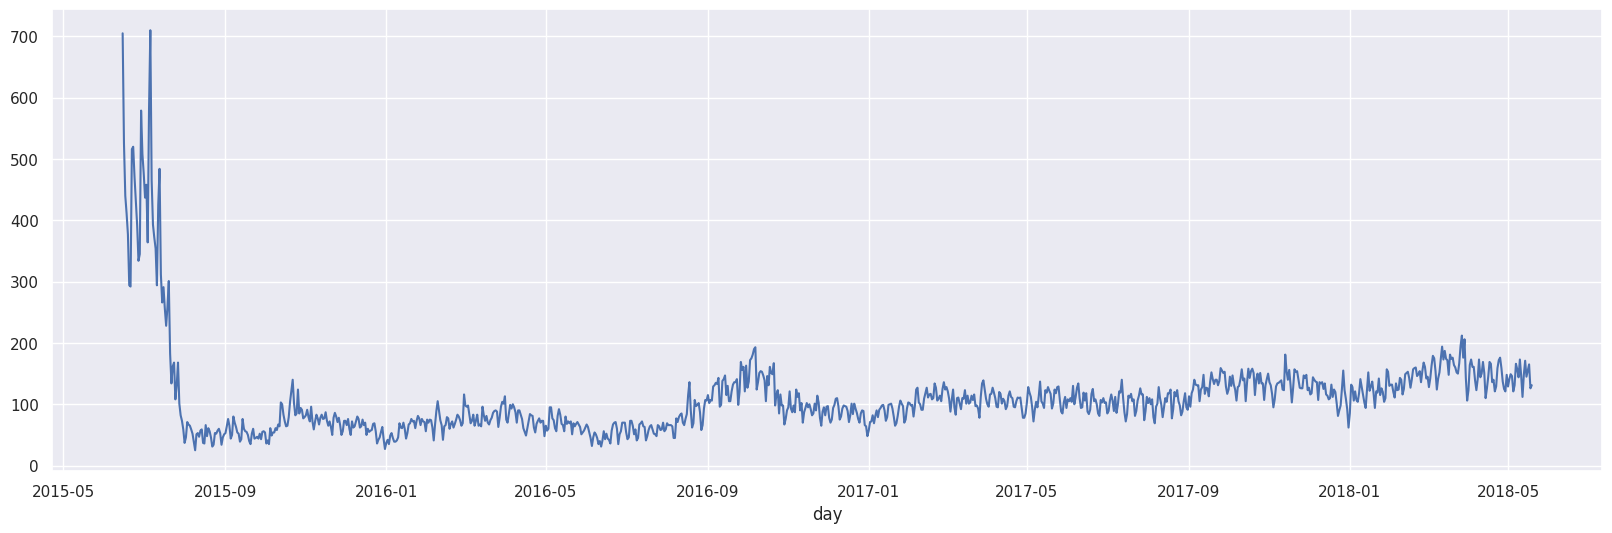

In [17]:
events_data.groupby('day').agg('user_id').nunique().plot();

In [18]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [19]:
events_data[events_data['action'] == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id': 'count'})\
    .rename(columns={'step_id': 'passed_step'}).head()

,user_id,passed_step
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


##### Без учёта тех, кто не прошел ни одного степа

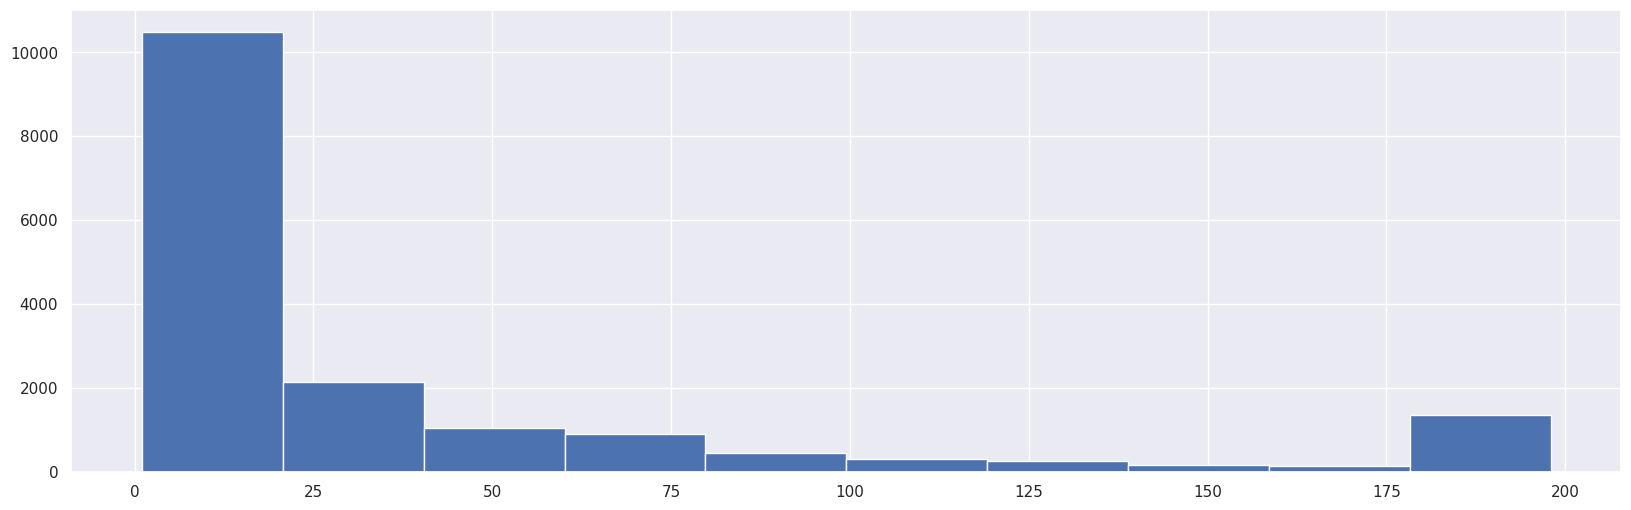

In [20]:
events_data[events_data['action'] == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id': 'count'})\
    .rename(columns={'step_id': 'passed_step'})['passed_step'].hist();

In [27]:
events_data[events_data['action'] == 'passed']['user_id'].nunique()

17262

In [24]:
events_data['user_id'].nunique()

19234

In [44]:
pd.crosstab(events_data['user_id'], events_data['action']).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


##### С учётом тех, кто не прошел ни одного степа

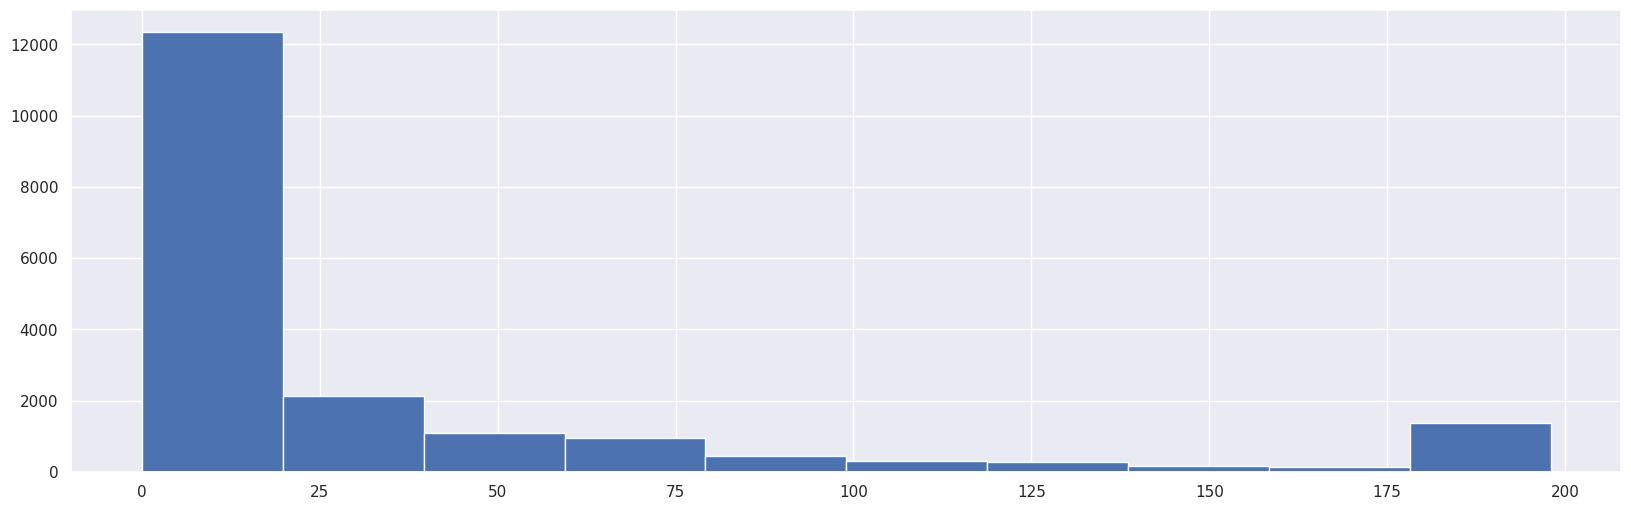

In [32]:
pd.crosstab(events_data['user_id'], events_data['action'])['passed'].hist();

In [43]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


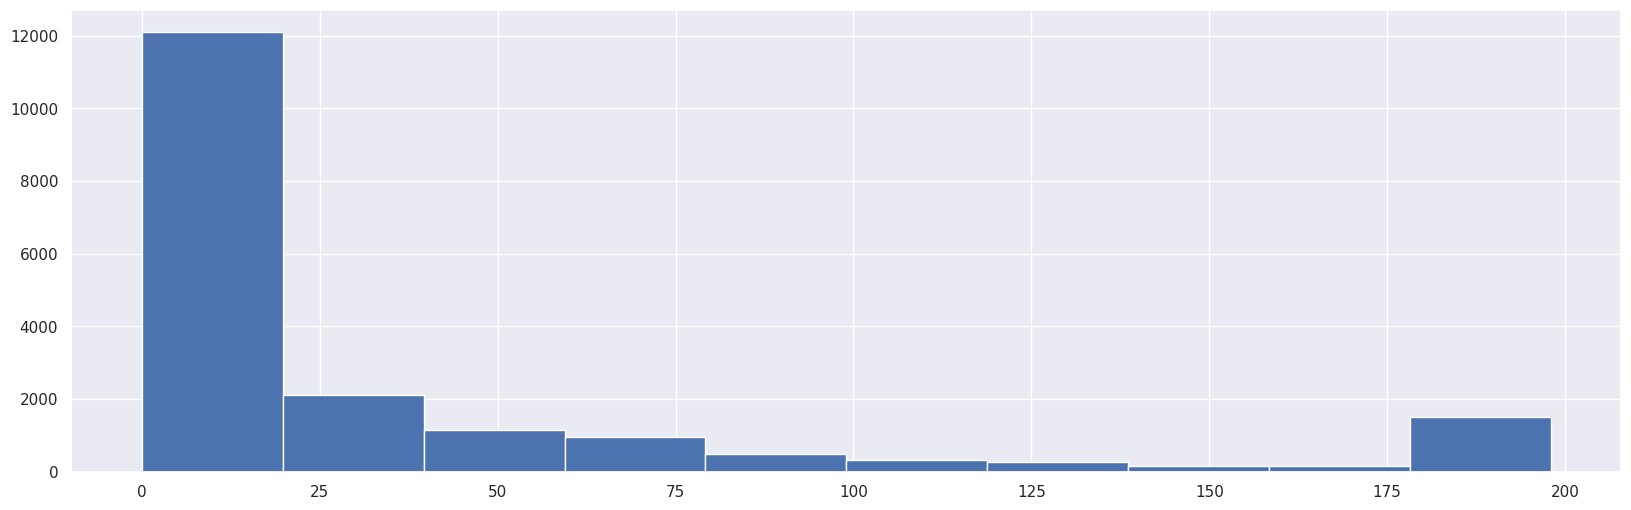

In [47]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()['discovered'].hist();